In [1]:
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
sampling_path = 'UnderSampling and OverSampling.png'
img = Image.open(sampling_path)

### Undersampling
- 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 수준으로 감소 샘플링   
- 학습에 사용되는 데이터 수가 줄어들기 때문에 학습의 성능이 줄 수 있으므로 주의해야한다.


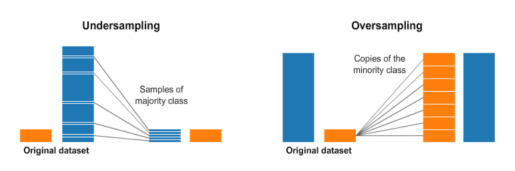

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

### Oversampling   
- 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식   
- 이 방법이 가능하다면 언더 샘플링보다 좋은 해결책일 수 있지만, 어떻게 없던 데이터를 생성해야 하는지가 중요   
- 예를 들어 1000개 데이터셋을 10,000개로 늘렸으나 중복되는 데이터가 섞일 수 있다.   
- 과적합이 될 수 있다.

### 왜 샘플링을 해야하는가?   
- 학습을 제대로 시키기 위해서이다.   
- 정확도의 이슈
    + 정답의 비율이 9:1일 때 상관없이 다 학습을 한다.
        + 우리는 9:1 중에서 1을 잘 예측(분류)하는게 중요하다.   
        * 모델은 전체적인 정확도를 보면 9를 예측하는 것도 잘 한것이라고 정확도가 측정된다.   
        - 클래스가 불균형 하게 되면 9:1로 예측하여 정확도를 측정하면 90% 이상이 나올 수 있다.   
            + 근데 이게 정말 높은 수치일까?   
    - 1. A모델 90%의 비중을 80% 정확하게 분류하고, 10% 비중을 100% 정확하게 분류
    - 2. B모델 90%의 비중을 90% 정확하게 분류하고, 10% 비중을 50% 정확하게 분류한다.   
        - -> 90%의 비중을 뷴류하는게 조금 떨어지더라도 10% 비중을 100% 정확하에 분류(예측)하는게 더 적합할 수 있다. 즉, 1.이 2.보다 적합할 수 있다.

### SMOTE (Synthetic Minority Over-Sampling Technique)   
- 낮은 비율 클래스 데이터들의 최근접 이웃을 이용하여 새로운 데이터를 생성   
- 완전히 똑같은 특성을 가진 데이터를 추출하는 것은 의미없기에, 근접해 있는 데이터들과 일정한 거리만큼 떨어진 위치에 데이터를 생성하는 것이다.   

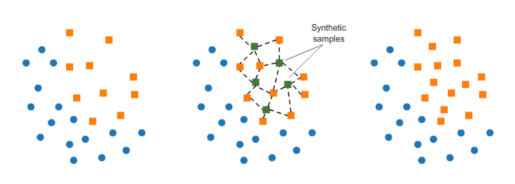

In [5]:
smote_path = 'smote.png'
img = Image.open(smote_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### ADASYN (Adaptive Synthetic Sampling Approach)   
- SMOTE 알고리즘의 단점을 보완하기 위한 기법   
    - SMOTE 알고리즘은 데이터를 전반적으로 증가시키기에 학습이 어려운 데이터를 고려하지 못한다   
        * 가령, 1의 클래스에 속하는 데이터 주위에 1의 클래스에 속하는 데이터만이 존재한다고 해보자.   
        이 경우, 특정 데이터가 1의 클래스에 속한다는 것을 쉽게 확인할 수 있다.   
        그러나 해당 클래스 주위에 1의 클래스에 속하는 데이터가 3개, 2의 클래스에 속하는 데이터가 3개 있다고 가졍해보자.   
        이 경우, 해당 데이터가 어느 클래스에 속하는지 확인하기 어렵다.   
- ADASYN은 특정 데이터 주변에 특정 데이터와 다른 클래스에 속하는 데이터의 수를 고려하여 데이터를 증강시킨다.   
- 즉, 특정 데이터와 다른 클래스에 속한 데이터가 주변에 많을수록, 특정 데이터와 같은 클래스에 속한 인위적 (synthetic) 데이터를 많이 생성하여, 클래스 간의 경계를 더욱 확고히 하고자 한다.




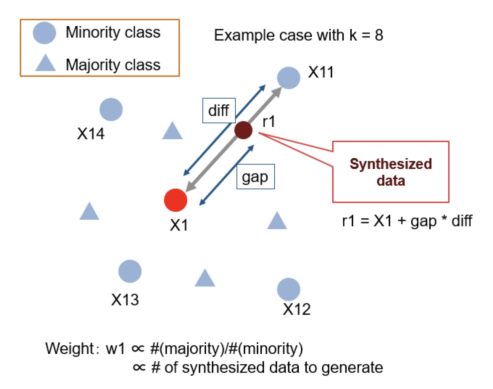

In [6]:
adasyn_path = 'ADASYN.png'
img = Image.open(adasyn_path)
plt.imshow(img)
plt.axis('off')
plt.show()

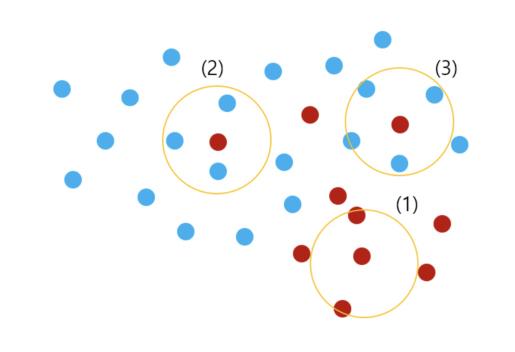

In [7]:
adasyn_path2 = 'ADASYN2.png'
img = Image.open(adasyn_path2)
plt.imshow(img)
plt.axis('off')
plt.show()

- Minority class 관측치에 대해서 주변에 majority class 관측치가 많을 수록 더 많이 oversampling한다.   
- 위 그림에서 빨간색이 소수 클래스일 때, 1/2/3번 각각의 샘플의 주변을 살펴봤을 때,   
파란색(다수 클래스)이 많은 관측치는 3번이다. 3번은 소수/다수를 분류하기 어려운 관측치이기 때문에,    
이를 더 잘 학습하기 위해서 3번에 대해서 샘플링을 더 많이 실시한다. 

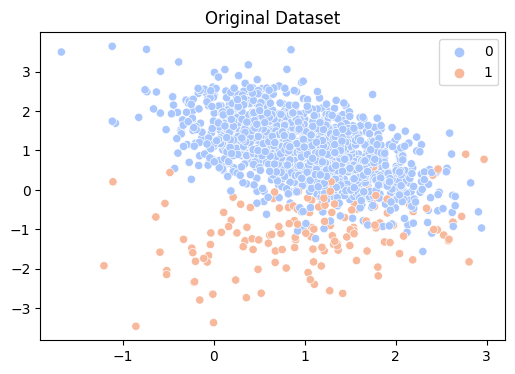

Original class distribution: Counter({0: 1351, 1: 149})


In [8]:
from sklearn.datasets import make_classification
import seaborn as sns
from collections import Counter

# 불균형한 데이터셋 생성
X, y = make_classification(n_samples=1500, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=1)

# 클래스 비율 시각화
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm')
plt.title("Original Dataset")
plt.show()

print(f"Original class distribution: {Counter(y)}")

In [12]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [13]:
# 랜덤 오버샘플링
ros = RandomOverSampler(random_state=111)
X_ros, y_ros =ros.fit_resample(X,y)

# SMOTE 
smt =SMOTE(random_state=111)
X_smt, y_smt =smt.fit_resample(X,y)

# ADASYN
ads=ADASYN(random_state=111)
X_ads, y_ads=ads.fit_resample(X,y)

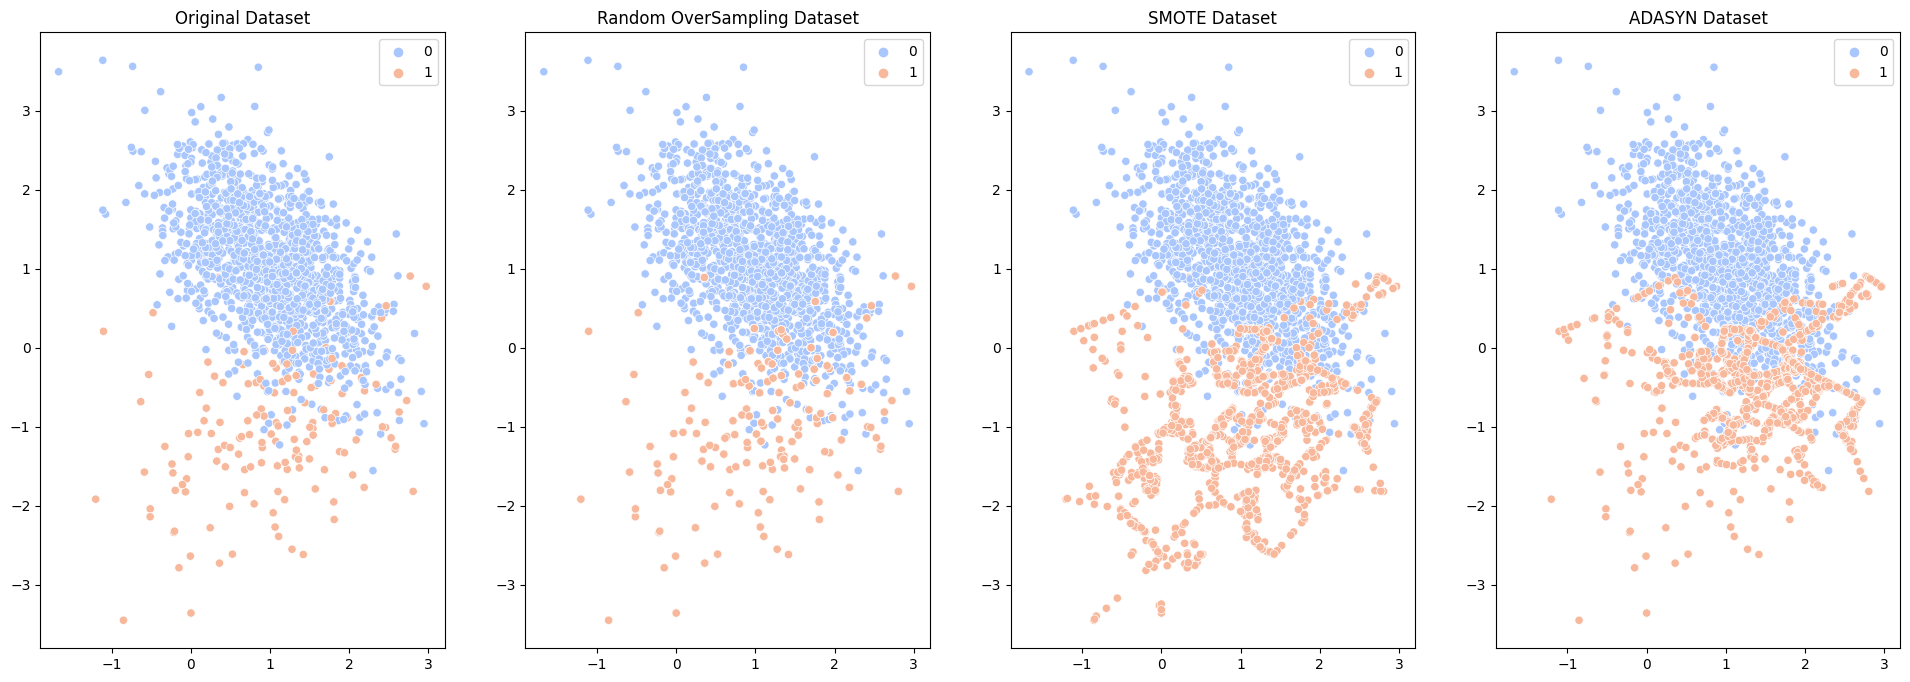

In [14]:
## 각 샘플링 기법에 대한 시각화
fig, axes = plt.subplots(1,4, figsize=(24,8))

#원본 데이터
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='coolwarm', ax=axes[0])
axes[0].set_title('Original Dataset')

#랜덤 오버 샘플링
sns.scatterplot(x=X_ros[:,0], y=X_ros[:,1], hue=y_ros, palette='coolwarm', ax=axes[1])
axes[1].set_title('Random OverSampling Dataset')

#SMOTE
sns.scatterplot(x=X_smt[:,0], y=X_smt[:,1], hue=y_smt, palette='coolwarm', ax=axes[2])
axes[2].set_title('SMOTE Dataset')


#ADASYN
sns.scatterplot(x=X_ads[:,0], y=X_ads[:,1], hue=y_ads, palette='coolwarm', ax=axes[3])
axes[3].set_title('ADASYN Dataset')

plt.show()

In [15]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate

In [17]:
from imblearn.under_sampling import RandomUnderSampler

In [18]:
##파이프라인 설치
pipeline_base =Pipeline([
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(random_state=111))
])

#over smote
pipeline_smote =Pipeline([
    ('scaler',StandardScaler()),
    ('smote',SMOTE(random_state=111)),
    ('model',LogisticRegression(random_state=111))
])

#under random
pipeline_under =Pipeline([
    ('scaler',StandardScaler()),
    ('under',RandomUnderSampler(random_state=111)),
    ('model',LogisticRegression(random_state=111))
])

# 교차검증

cv =StratifiedKFold(n_splits =5, shuffle= True , random_state=111)

# 성능 평가
score_base =cross_validate(pipeline_base, X,y, cv=cv, scoring= ['accuracy','precision','recall','f1'])


In [19]:
## 샘플링이 없는 경우
print('샘플링이 없는 경우')
print(f"Accuracy : {score_base['test_accuracy'].mean():.4f} {score_base['test_accuracy'].std():.4f}")
print(f"precision : {score_base['test_precision'].mean():.4f} {score_base['test_precision'].std():.4f}")
print(f"recall : {score_base['test_recall'].mean():.4f} {score_base['test_recall'].std():.4f}")
print(f"f1 : {score_base['test_f1'].mean():.4f} {score_base['test_f1'].std():.4f}")

샘플링이 없는 경우
Accuracy : 0.9560 0.0144
precision : 0.8446 0.0496
recall : 0.6855 0.1533
f1 : 0.7460 0.1112


In [20]:
score_base =cross_validate(pipeline_smote, X,y, cv=cv, scoring= ['accuracy','precision','recall','f1'])
## smote
print('SMOTE')
print(f"Accuracy : {score_base['test_accuracy'].mean():.4f} {score_base['test_accuracy'].std():.4f}")
print(f"precision : {score_base['test_precision'].mean():.4f} {score_base['test_precision'].std():.4f}")
print(f"recall : {score_base['test_recall'].mean():.4f} {score_base['test_recall'].std():.4f}")
print(f"f1 : {score_base['test_f1'].mean():.4f} {score_base['test_f1'].std():.4f}")

SMOTE
Accuracy : 0.9007 0.0120
precision : 0.5029 0.0368
recall : 0.8929 0.0321
f1 : 0.6421 0.0275


In [21]:
score_base =cross_validate(pipeline_under, X,y, cv=cv, scoring= ['accuracy','precision','recall','f1'])
## smote
print('Under')
print(f"Accuracy : {score_base['test_accuracy'].mean():.4f} {score_base['test_accuracy'].std():.4f}")
print(f"precision : {score_base['test_precision'].mean():.4f} {score_base['test_precision'].std():.4f}")
print(f"recall : {score_base['test_recall'].mean():.4f} {score_base['test_recall'].std():.4f}")
print(f"f1 : {score_base['test_f1'].mean():.4f} {score_base['test_f1'].std():.4f}")

Under
Accuracy : 0.8967 0.0089
precision : 0.4911 0.0270
recall : 0.8929 0.0321
f1 : 0.6325 0.0145


### 각 샘플링 결과에 대한 설명   

#### 샘플링이 없는 경우
- 샘플링을 하지 않은 기본 모델의 경우, 높은 정확도(0.9560)를 보여준다.   
이는 데이터가 불균형한 경우 전체적인 성능을 과대평가할 수 있다.   
특히, 정밀도는 0.8446으로 높게 나타나지만, 재현율은 0.6855로 상대적으로 낮아 모델이 실제 양성 클래스(긍정적 사례)를 놓치는 경향이 있음을 알 수 있다.   
F1 점수는 0.7460으로, 두 성능 지표(Precision, Recall) 사이의 균형을 보여주지만   
여전히 불균형한 데이터로 인해 재현율이 낮게 측정되었다.   
   
#### SMOTE   
- SMOTE를 사용하여 데이터의 불균형을 해결하려 한 경우, 정확도는 0.9007로 감소했다.   
하지만 재현율은 0.8929로 크게 향상되었다.   
이는 모델이 더 많은 양성 클래스를 올바르게 예측하게 되었음을 의미한다.   
반면, 정밀도는 0.5029로 낮아졌는데, 이는 모델이 예측한 양성 중 실제로는 음성인 경우(거짓 양성, False Positive)가 많아졌음을 의미한다.   
F1 점수는 0.6421로, 이 기법이 재현율을 높이는 데 효과적이지만 정밀도 측면에서 손해를 보는 것을 보여준다.   
   
#### 언더 샘플링   
- SMOTE와 유사하게 재현율은 0.8929로 매우 높다. 하지만 정밀도는 0.4911로 더 낮아졌다.   
정확도는 0.8967로 약간 낮아졌지만, SMOTE와 비교했을 때 F1 점수가 약간 낮다.   
이는 언더 샘플링이 데이터 손실로 인해 전체적인 성능이 다소 떨어질 수 있음을 의미한다.